In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import  log,sqrt,exp
from scipy.stats import norm

class Options:

    class call:
            
        def __init__(self):
            self.X=np.arange(0,2*E,0.001)

        def call(self,S=None, K=None, T=1, t=0, sigma=0.3, r=0.1, q=0):
            d1 = (log(S/K)+(r-q+sigma*sigma/2)*(T-t))/(sigma*sqrt(T-t))
            d2 = d1 - sigma*sqrt(T-t)
            self.price =  S*exp(-q*(T-t))*norm.cdf(d1) - K*exp(-r*(T-t))*norm.cdf(d2)
            return self.price

        def buy(self,E,price = None ,S=None,  T=1, t=0, sigma=0.3, r=0.1, q=0):
            if(price is None):
                price = self.call(S, E, T, t, sigma, r, q)
            L=[]
            for x in self.X:
                if(x<=E):
                    L.append(-price)
                else:
                    L.append(x-E-price)
            self.L=np.array(L)

        def sell(self,E, price = None ,S=None, T=1, t=0, sigma=0.3, r=0.1, q=0):
            if(price is None):
                price = self.call(S, E, T, t, sigma, r, q)

            L=[]
            for x in self.X:
                if(x<=E):
                    L.append(price)
                else:
                    L.append(price+E-x)
            self.L=np.array(L)

        def get_profit(self):
            return self.L
        
        def get_price(self,St):
            for i in range(1,len(self.X)):   
                   if(self.X[i-1] <= St and self.X[i] >= St):
                        return self.L[i]
            
    class put:
            
        def __init__(self):
            self.X=np.arange(0,2*E,0.001)
            
        def put(self,S=None, K=None, T=1, t=0, sigma=0.3, r=0.1, q=0):
            d1 = (log(S/K)+(r-q+sigma*sigma/2)*(T-t))/(sigma*sqrt(T-t))
            d2 = d1 - sigma*sqrt(T-t)
            self.price = -S*exp(-q*(T-t))*norm.cdf(-d1) + K*exp(-r*(T-t))*norm.cdf(-d2)
            return self.price
        
        def put_fair_price(self,S=None, K=None, T=1, t=0, sigma=0.3, r=0.1, q=0):
            d1 = (log(S/K)+(r-q+sigma*sigma/2)*(T-t))/(sigma*sqrt(T-t))
            d2 = d1 - sigma*sqrt(T-t)
            price = -S*exp(-q*(T-t))*norm.cdf(-d1) + K*exp(-r*(T-t))*norm.cdf(-d2)
            return price

        def buy(self,E,price = None, S=None, T=1, t=0, sigma=0.3, r=0.1, q=0):
            if(price is None):
                price = self.put(S, E, T, t, sigma, r, q)

            L=[]
            for x in self.X:
                if(x<=E):
                    L.append(E-x-price)
                else:
                    L.append(-price)
            self.L=np.array(L)

        def sell(self,E,price = None ,S=None,T=1, t=0, sigma=0.3, r=0.1, q=0):
            if(price is None):
                price = self.put(S, E, T, t, sigma, r, q)
        
            L=[]
            for x in self.X:
                if(x<=E):
                    L.append(x-E-price)
                else:
                    L.append(-price)
            self.L=np.array(L)
        
        def get_profit(self):
            return self.L
        
        def get_price(self,St):
            for i in range(1,len(self.X)):   
                   if(self.X[i-1] <= St and self.X[i] >= St):
                        return self.L[i]

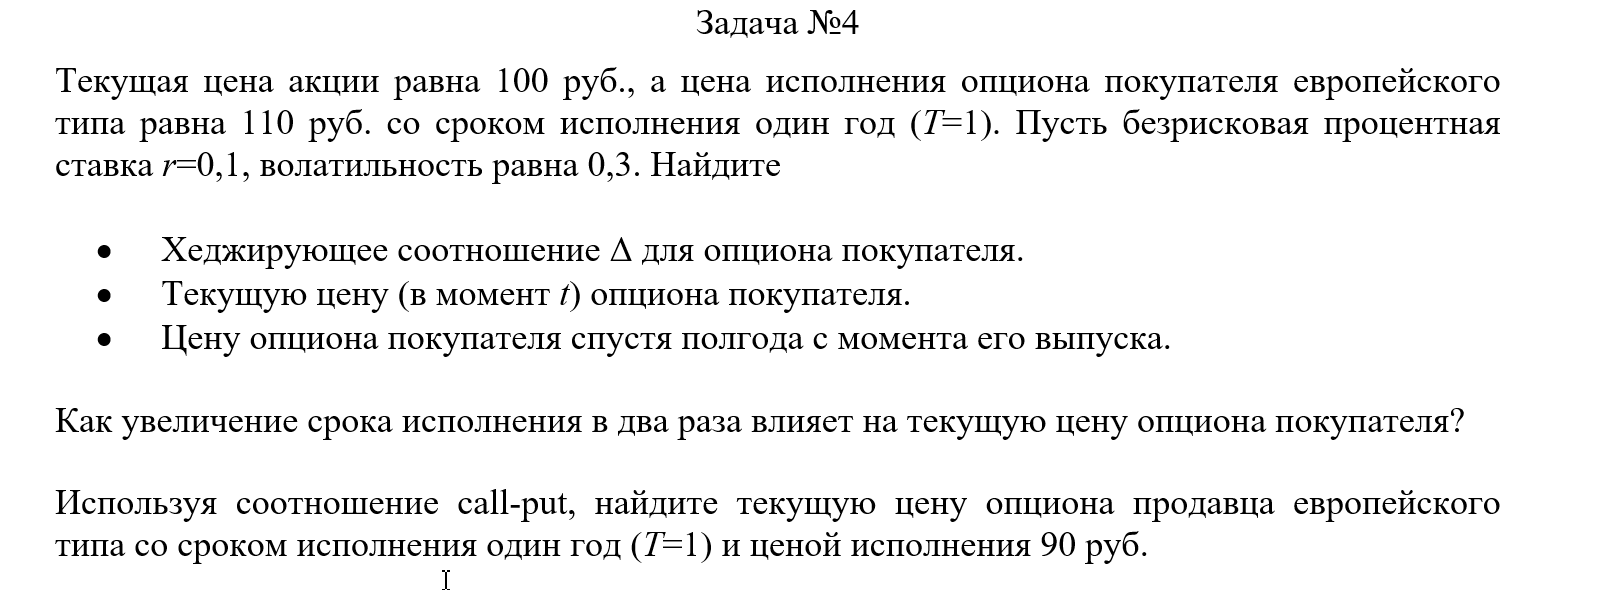

In [2]:
import numpy as np
from numpy import  log,sqrt,exp
from scipy.stats import norm

def call(S, K, T, t, sigma, r, q):
    d1 = (log(S/K)+(r-q+sigma*sigma/2)*(T-t))/(sigma*sqrt(T-t))
    d2 = d1 - sigma*sqrt(T-t)
    return S*exp(-q*(T-t))*norm.cdf(d1) - K*exp(-r*(T-t))*norm.cdf(d2)

def d1(S,K,r,sigma,tau):
    return (log(S/E)+(r+(sigma**2)/2)*tau)/(sigma*sqrt(tau))

def D(S, K, tau, sigma, r):
  return norm.cdf(d1(S,K,r,sigma,tau))


In [3]:
S0=100
E=110
T=1
r=0.1
sigma=0.3
print("Delta: ",np.round(D(S0, E, T, sigma, r),3))
print("Цена сегодня:",round(call(S0,E,T,0,sigma,r,0),4))
print("Цена через полгода:",round(call(S0,E,T,0.5,sigma,r,0),4))


Delta:  0.566
Цена сегодня: 12.131
Цена через полгода: 6.5208


In [4]:
S0=100
E=110
T=2
r=0.1
sigma=0.3
print("Delta: ",np.round(D(S0, E, T, sigma, r),4))
print("Цена сегодня:",round(call(S0,E,T,0,sigma,r,0),4))
print("Цена через полгода:",round(call(S0,E,T,0.5,sigma,r,0),4))


Delta:  0.6768
Цена сегодня: 21.4103
Цена через полгода: 17.0043


In [5]:
S0=100
E=90
T=1
r=0.1
sigma=0.3

print("Цена продавца:",round(call(S0,E,T,0,sigma,r,0) - S0 + E*exp(-r*T),4))

Цена продавца: 3.9454


In [6]:
S0=100
E=90
T=1
r=0.1
sigma=0.3
put = Options.put()
print("Цена продавца:",round(put.put_fair_price(S=S0, K=E, T=T, t=0, sigma=sigma, r=r, q=0),4))

Цена продавца: 3.9454
